#### Real number set is infinite

* infinitely large
* infinitely divisible

For computation, we need to make compromise

* Symbolic: give up on finite time
* Numerical: give up on exact representation (which is our focus)

#### Build floating point set

`First`, we build $2^m$ equally spaced `numbers` in $[1,2)$

For IEEE double precision, $m=52$

Below is illustration using $m=4$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

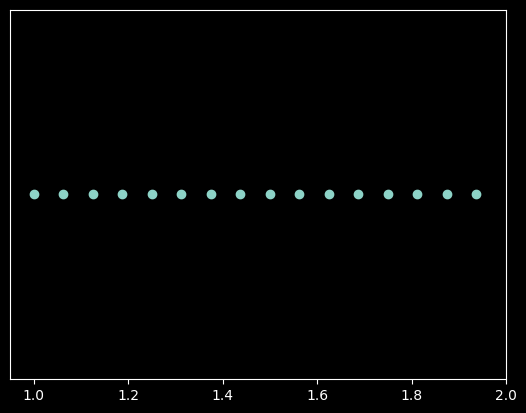

In [ ]:
m = 4
x = np.linspace(1, 2, 2**m, endpoint=False)
plt.plot(x, np.zeros_like(x), 'o')
plt.xlim(0.95, 2)
plt.yticks([])
plt.show()

`Then`, in order to represent other real numbers, we need to

* scale up to $[2, 4), [4, 8)\cdots$, by multiplying with $2^j, j=1, 2, \cdots$
* and also down to $[1/2, 1), [1/4, 1/2)\cdots$, by multiplying with $2^j, j=-1, -2, \cdots$

We will get something like the following

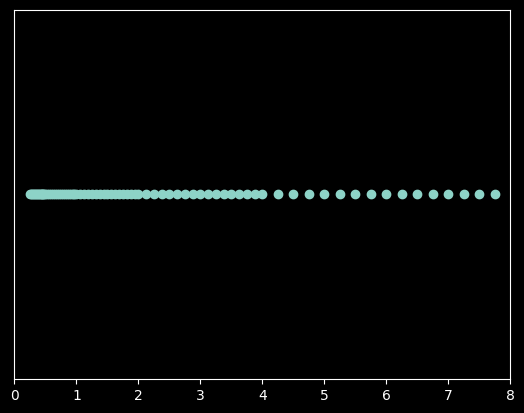

In [ ]:
x_multiple = np.array([(2**j)*np.linspace(1, 2, 2**m, endpoint=False) for j in range(-2, 3)]).flatten()
plt.plot(x_multiple, np.zeros_like(x_multiple), 'o')
plt.xlim(0, 8)
plt.yticks([])
plt.show()

As the number gets bigger, the space between numbers begins to `grow`, and as the number goes to zero, the space between numbers starts to `shrink`

In IEEE double precision, there are upper and lower limits of $j$

If we have a number larger than largest interval it can cover, it is called `overflow`, if smaller than the smallest interval it can cover, it is called `underflow`

We can also plot how many numbers the IEEE double precision can represent with values smaller than $x$

First, $x$ in standard scale

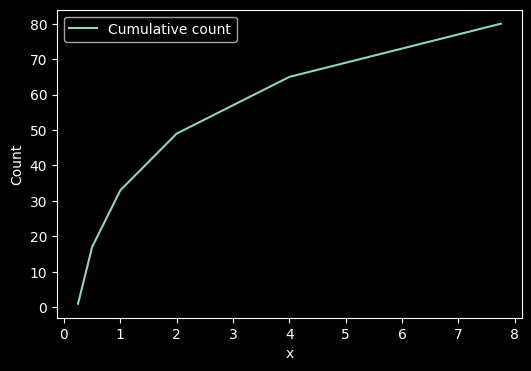

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(x_multiple, np.arange(1, len(x_multiple) + 1), label="Cumulative count")
plt.xlabel("x")
plt.ylabel("Count")
plt.legend()
plt.show()

Then, in log-scale

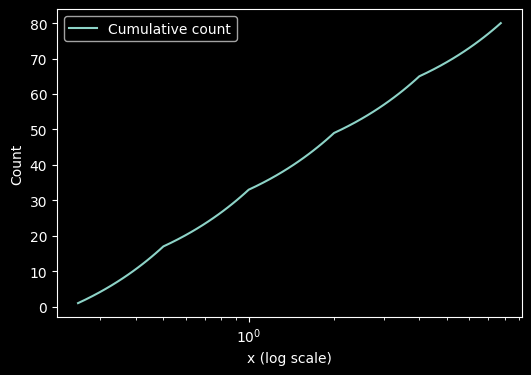

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(x_multiple, np.arange(1, len(x_multiple) + 1), label="Cumulative count")
plt.xscale("log")
plt.xlabel("x (log scale)")
plt.ylabel("Count")
plt.legend()
plt.show()

#### Machine precision

The difference between 1 and the next-larger floating point number is machine epsilon $\epsilon_m$

For IEEE double precision, it is $2^{-52}$, since there are $2^{52}$ numbers represented in $[1, 2)$

In [ ]:
eps = np.finfo(float).eps
print(eps)
print(2**-52)
print('Significant digits in floating point value', np.log10(eps))

2.220446049250313e-16
2.220446049250313e-16
Significant digits in floating point value -15.653559774527022


In [ ]:
y = 1 + eps
print(y)
print(y - 1)

1.0000000000000002
2.220446049250313e-16


If we try to add a number smaller than $\epsilon_m$, nothing will be done

In [ ]:
y_1 = 1 + eps / 2
print(y_1 - 1)

0.0


#### Precision in relative terms

The difference between a real number $x$ and its closest floating point approximation $\text{fl}(x)=(1+\epsilon)x$ is always smaller than $\epsilon_m$ in `relative terms` (that is, $\Delta=\epsilon x$ rather than $\epsilon$ itself, where $|\epsilon| \leq \epsilon_m$)

Therefore, every operation introduces a `relative error` no larger than $\epsilon_m$, for example

$$\text{fl}(x+y)=(1+\epsilon)(x+y)$$

#### Cancellation error

A cancellation error, also known as loss of significance, occurs when the result of an operation is inexact due to the subtraction of numbers that are nearly equal or the addition of numbers with opposite signs but similar absolute values

In [ ]:
pi_numpy = np.pi
print(pi_numpy)

3.141592653589793


In [ ]:
pi_approx = 355/113.
print(pi_approx)

3.1415929203539825


In [ ]:
print(pi_numpy - pi_approx)

-2.667641894049666e-07


Here, we know that when doing subtraction, we would only have no better than 9 significant digits left, since the first 7 digits are the same

Therefore, for the result -2.667641894049666e-07, we should be careful as the final 7 digits are meaningless